In [165]:
import pandas as pd
import seaborn as sb
import numpy as np
movies=pd.read_csv('Movie_collection.csv')

In [166]:
movies.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,PG,494,0
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,PG,462,1
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,PG,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,PG,472,0
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,PG,395,0


In [167]:
movies.describe()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,45057.707510,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,0.454545
std,18364.351764,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,0.498422
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,0.000000
25%,34050.000000,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,0.000000
50%,42400.000000,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,0.000000
75%,50000.000000,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,1.000000
max,100000.000000,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000


In [168]:
movies.shape

(506, 20)

<AxesSubplot:xlabel='Collection'>

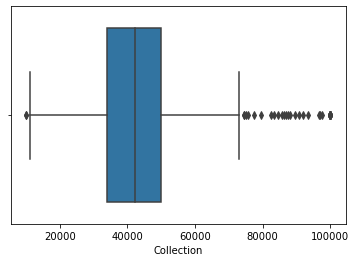

In [169]:
sb.boxplot(x='Collection',data=movies)

Outlier Detection and removal using IQR method
collection_q1=movies['Collection'].quantile(0.25)
collection_q3=movies['Collection'].quantile(0.75)
collection_IQR=collection_q3-collection_q1
collection_upper=collection_q3+1.5*collection_IQR
collection_lower=collection_q1-1.5*collection_IQR
collection_lower
movies=movies[~((movies['Collection']<collection_lower) | (movies['Collection']>collection_upper))]

In [170]:
upper=np.percentile(movies.Collection,[90][0])
lower=np.percentile(movies.Collection,[1][0])

In [171]:
movies.Collection[movies.Collection<lower]=lower

<ipython-input-171-5159fb2845f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Collection[movies.Collection<lower]=lower


In [172]:
movies.Collection[movies.Collection>upper]=upper

"Collection" variable outlier treated using Capping method.

<AxesSubplot:xlabel='Collection'>

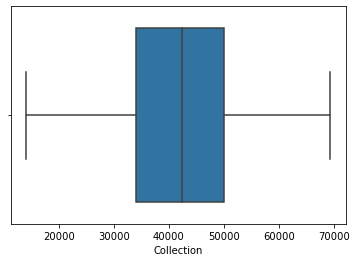

In [173]:
sb.boxplot(x='Collection',data=movies)

In [174]:
movies.isnull().any()

Collection             False
Marketing expense      False
Production expense     False
Multiplex coverage     False
Budget                 False
Movie_length           False
Lead_ Actor_Rating     False
Lead_Actress_rating    False
Director_rating        False
Producer_rating        False
Critic_rating          False
Trailer_views          False
3D_available           False
Time_taken              True
Twitter_hastags        False
Genre                  False
Avg_age_actors         False
MPAA_film_rating       False
Num_multiplex          False
Start_Tech_Oscar       False
dtype: bool

In [175]:
movies.Time_taken=movies.Time_taken.fillna(movies.Time_taken.median())

In [176]:
movies.Time_taken.isnull().any()

False

<AxesSubplot:xlabel='Time_taken'>

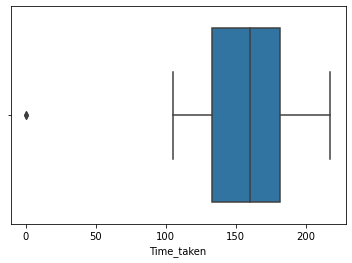

In [177]:
sb.boxplot(x="Time_taken",data=movies)

In [178]:
lower_time=np.percentile(movies.Time_taken,[1][0])
movies.Time_taken[movies.Time_taken<lower_time]=lower_time

<ipython-input-178-79839d35263e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Time_taken[movies.Time_taken<lower_time]=lower_time


<AxesSubplot:xlabel='Time_taken'>

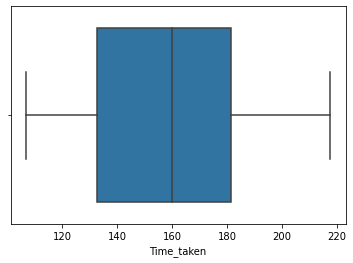

In [179]:
sb.boxplot(x="Time_taken",data=movies)

<AxesSubplot:xlabel='Marketing expense'>

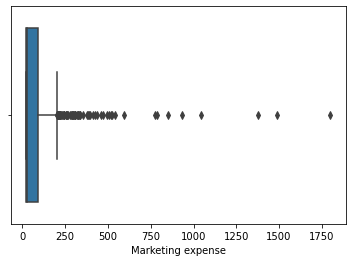

In [180]:
sb.boxplot(x='Marketing expense',data=movies)

In [181]:
movies['Marketing expense'].describe()

count     506.000000
mean       92.270471
std       172.030902
min        20.126400
25%        21.640900
50%        25.130200
75%        93.541650
max      1799.524000
Name: Marketing expense, dtype: float64

In [182]:

upper_market=np.percentile(movies['Marketing expense'],[87][0])
upper_market
movies['Marketing expense'][movies['Marketing expense']>upper_market]=upper_market

<ipython-input-182-666844136c6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Marketing expense'][movies['Marketing expense']>upper_market]=upper_market


<AxesSubplot:xlabel='Marketing expense'>

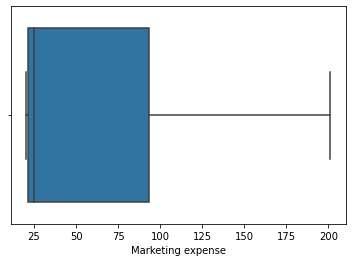

In [183]:
sb.boxplot(x='Marketing expense',data=movies)

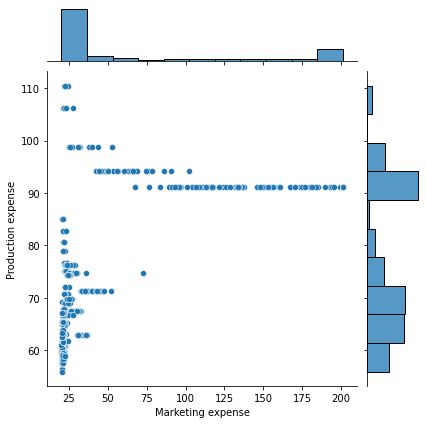

In [184]:
sb.jointplot(x='Marketing expense',y='Production expense',data=movies)

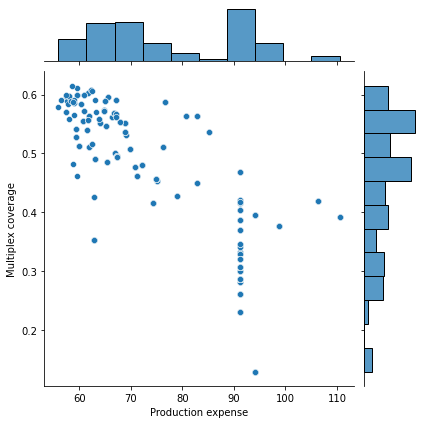

In [185]:
sb.jointplot(x="Production expense",y="Multiplex coverage",data=movies)

"Production expense" and "Multiplex coverage" field has no outliers

<AxesSubplot:xlabel='Budget'>

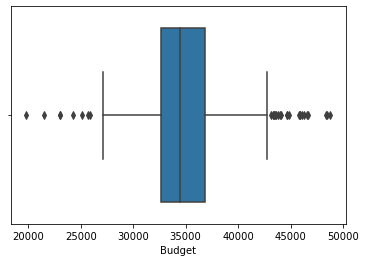

In [186]:
sb.boxplot(x="Budget",data=movies)

In [187]:
upper_budget=np.percentile(movies['Budget'],[95][0])
lower_budget=np.percentile(movies.Budget,[5][0])
movies.Budget[(movies.Budget<lower_budget)]=lower_budget

<ipython-input-187-51b2035e5a61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Budget[(movies.Budget<lower_budget)]=lower_budget


In [188]:
movies.Budget[(movies.Budget>upper_budget)]=upper_budget

<ipython-input-188-812ca3c425fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Budget[(movies.Budget>upper_budget)]=upper_budget


<AxesSubplot:xlabel='Budget'>

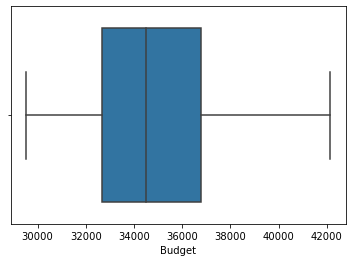

In [189]:
sb.boxplot(x="Budget",data=movies)

In [190]:
movies.describe()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,43381.462451,64.460837,77.273557,0.445305,34917.862717,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.880119,260.832095,39.181818,545.043478,0.454545
std,14382.844740,66.184710,13.720706,0.115878,3227.296974,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,29.454907,104.779133,12.513697,106.332889,0.498422
min,14020.000000,20.126400,55.920000,0.129000,29519.270000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,106.750000,201.152000,3.000000,333.000000,0.000000
25%,34050.000000,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,0.000000
50%,42400.000000,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,0.000000
75%,50000.000000,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,1.000000
max,69300.000000,201.087620,110.480000,0.615000,42148.562500,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000


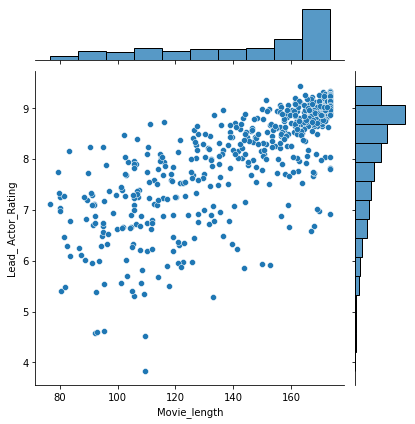

In [191]:
sb.jointplot(x="Movie_length",y="Lead_ Actor_Rating",data=movies)

<AxesSubplot:xlabel='Lead_ Actor_Rating'>

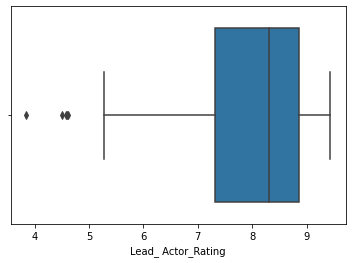

In [192]:
sb.boxplot(x="Lead_ Actor_Rating",data=movies)

In [193]:
lower_actor_rating=np.percentile(movies['Lead_ Actor_Rating'],[1][0])
lower_actor_rating
movies['Lead_ Actor_Rating'][movies['Lead_ Actor_Rating']<lower_actor_rating]=lower_actor_rating

<ipython-input-193-2de267d4621d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Lead_ Actor_Rating'][movies['Lead_ Actor_Rating']<lower_actor_rating]=lower_actor_rating


<AxesSubplot:xlabel='Lead_ Actor_Rating'>

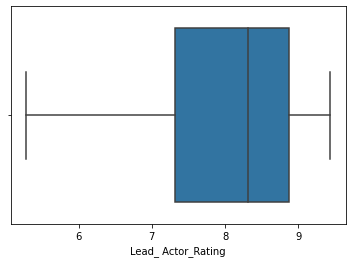

In [194]:
sb.boxplot(x="Lead_ Actor_Rating",data=movies)

<AxesSubplot:xlabel='Lead_Actress_rating'>

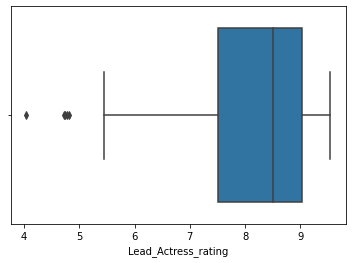

In [195]:
sb.boxplot(x="Lead_Actress_rating",data=movies)

In [196]:
lower_actress_rating=np.percentile(movies.Lead_Actress_rating,[1][0])
movies.Lead_Actress_rating[movies.Lead_Actress_rating<lower_actress_rating]=lower_actress_rating

<ipython-input-196-0c10f9a62ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Lead_Actress_rating[movies.Lead_Actress_rating<lower_actress_rating]=lower_actress_rating


<AxesSubplot:xlabel='Lead_Actress_rating'>

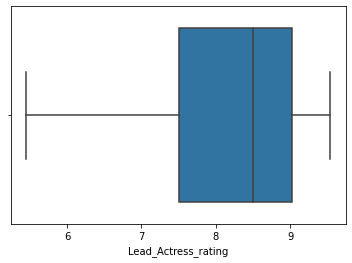

In [197]:
sb.boxplot(x="Lead_Actress_rating",data=movies)

<AxesSubplot:xlabel='Director_rating'>

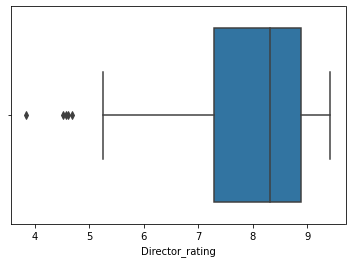

In [198]:
sb.boxplot(x="Director_rating",data=movies)

In [199]:
lower_Director_rating=np.percentile(movies.Director_rating,[1][0])
movies.Director_rating[movies.Director_rating<lower_Director_rating]=lower_Director_rating

<ipython-input-199-54867b94f114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Director_rating[movies.Director_rating<lower_Director_rating]=lower_Director_rating


<AxesSubplot:xlabel='Director_rating'>

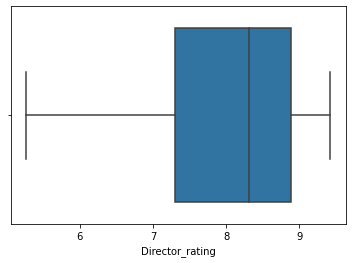

In [200]:
sb.boxplot(x="Director_rating",data=movies)

<AxesSubplot:xlabel='Producer_rating'>

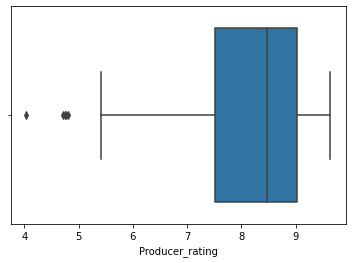

In [201]:
sb.boxplot(x="Producer_rating",data=movies)

In [202]:
lower_prod_rating=np.percentile(movies.Producer_rating,[1][0])
movies.Producer_rating[movies.Producer_rating<lower_prod_rating]=lower_prod_rating

<ipython-input-202-7fe3947f750a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Producer_rating[movies.Producer_rating<lower_prod_rating]=lower_prod_rating


<AxesSubplot:xlabel='Producer_rating'>

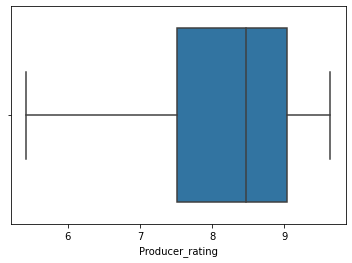

In [203]:
sb.boxplot(x="Producer_rating",data=movies)

<AxesSubplot:xlabel='Critic_rating'>

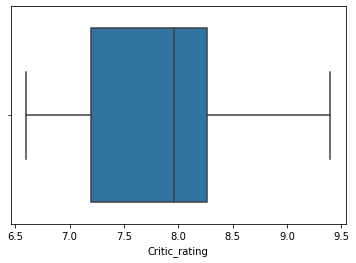

In [204]:
sb.boxplot(x="Critic_rating",data=movies)

<AxesSubplot:xlabel='Trailer_views'>

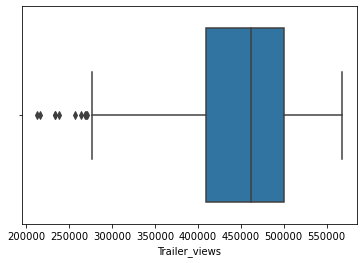

In [205]:
sb.boxplot(x="Trailer_views",data=movies)

In [206]:
lower_views=np.percentile(movies.Trailer_views,[5][0])
movies.Trailer_views[movies.Trailer_views<lower_views]=lower_views

<ipython-input-206-7eecd7ffea46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Trailer_views[movies.Trailer_views<lower_views]=lower_views


<AxesSubplot:xlabel='Trailer_views'>

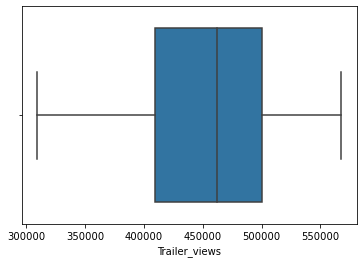

In [207]:
sb.boxplot(x="Trailer_views",data=movies)

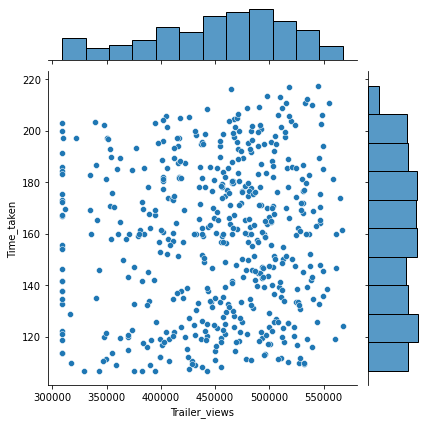

In [208]:
sb.jointplot(x="Trailer_views",y="Time_taken",data=movies)

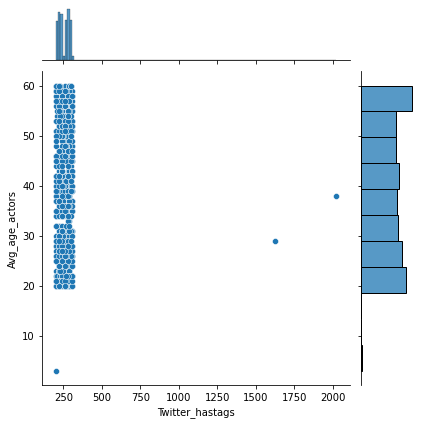

In [209]:
sb.jointplot(x="Twitter_hastags",y="Avg_age_actors",data=movies)

<AxesSubplot:xlabel='Twitter_hastags'>

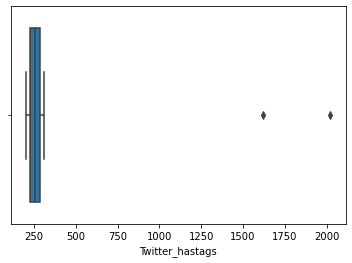

In [210]:
sb.boxplot(x="Twitter_hastags",data=movies)

In [211]:
upper_tweet=np.percentile(movies.Twitter_hastags,[99][0])
movies.Twitter_hastags[movies.Twitter_hastags>upper_tweet]=upper_tweet

<ipython-input-211-41c9606c85de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Twitter_hastags[movies.Twitter_hastags>upper_tweet]=upper_tweet


<AxesSubplot:xlabel='Twitter_hastags'>

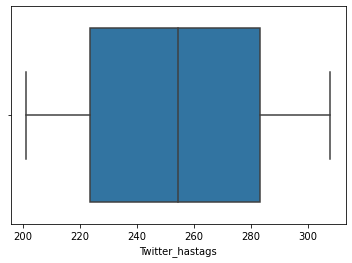

In [212]:
sb.boxplot(x="Twitter_hastags",data=movies)

<AxesSubplot:xlabel='Avg_age_actors'>

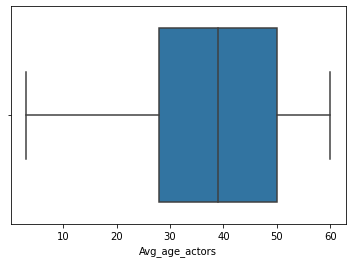

In [213]:
sb.boxplot(x="Avg_age_actors",data=movies)

<AxesSubplot:xlabel='Num_multiplex'>

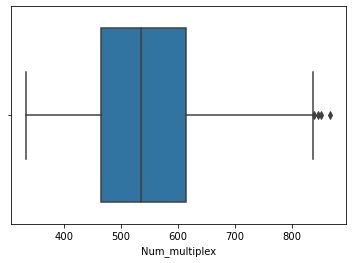

In [214]:
sb.boxplot(x="Num_multiplex",data=movies)

In [215]:
upper_multiplex=np.percentile(movies.Num_multiplex,[95][0])
movies.Num_multiplex[movies.Num_multiplex>upper_multiplex]=upper_multiplex

<ipython-input-215-608bf595a1af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.Num_multiplex[movies.Num_multiplex>upper_multiplex]=upper_multiplex


<AxesSubplot:xlabel='Num_multiplex'>

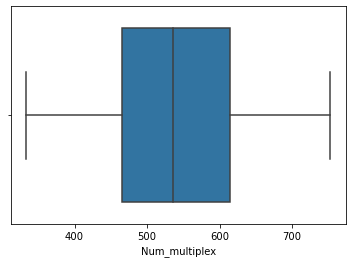

In [216]:
sb.boxplot(x="Num_multiplex",data=movies)

<AxesSubplot:xlabel='Start_Tech_Oscar', ylabel='count'>

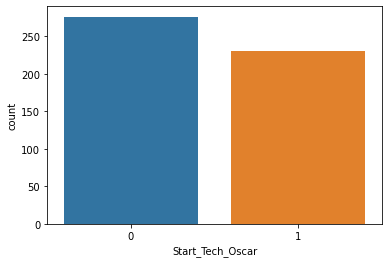

In [217]:
sb.countplot(x="Start_Tech_Oscar",data=movies)

<AxesSubplot:xlabel='Genre', ylabel='count'>

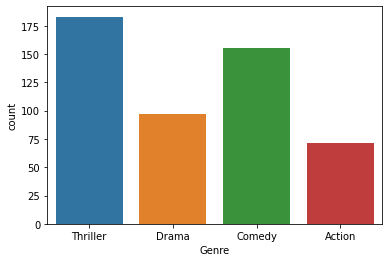

In [218]:
sb.countplot(x="Genre",data=movies)

<AxesSubplot:xlabel='MPAA_film_rating', ylabel='count'>

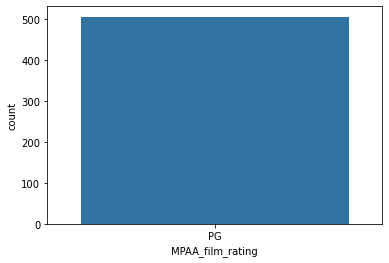

In [219]:
sb.countplot(x="MPAA_film_rating",data=movies)

<AxesSubplot:xlabel='count', ylabel='3D_available'>

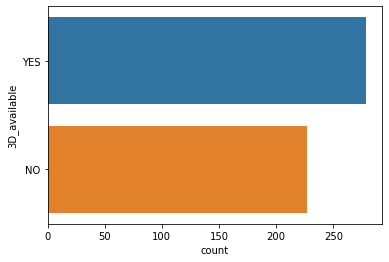

In [220]:
sb.countplot(y="3D_available",data=movies)

In [221]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           506 non-null    int64  
 1   Marketing expense    506 non-null    float64
 2   Production expense   506 non-null    float64
 3   Multiplex coverage   506 non-null    float64
 4   Budget               506 non-null    float64
 5   Movie_length         506 non-null    float64
 6   Lead_ Actor_Rating   506 non-null    float64
 7   Lead_Actress_rating  506 non-null    float64
 8   Director_rating      506 non-null    float64
 9   Producer_rating      506 non-null    float64
 10  Critic_rating        506 non-null    float64
 11  Trailer_views        506 non-null    float64
 12  3D_available         506 non-null    object 
 13  Time_taken           506 non-null    float64
 14  Twitter_hastags      506 non-null    float64
 15  Genre                506 non-null    obj

Observation
•Column with Outliers:
    1.	COLLECTION
    2.	MARKETING EXPENSE
    3.	BUDGET
    4.	LEAD_ACTOR_RATING
    5.	LEAD_ACTRESS_RATING
    6.	DIRECTOR _RATING
    7.	PRODUCER_RATING
    8.	TIME_TAKEN 
    9.	TRAILER_VIEWS
    10.	AVG_AGE_ACTOR
    11.	TWITTER_HASTAGS
    12.	NUM_MULTIPLEX


•	“Time_taken” variable contains NULL value.
•	“Genre”: highest occurred value ‘Thriller’ , lowest : ’Action’
•	“MPAA_film_rating” variable has only one value “PG”
•	Most of the film have 3D option


OUTLIER  TREATMENT USING CAPPING COMPLETED , DATA IS NOW READY FOR FUTHER PROCESSING 

In [222]:
movies=pd.get_dummies(movies)

In [223]:
movies.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,23,494.0,0,0,1,0,0,0,1,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,42,462.0,1,1,0,0,0,1,0,1
2,69300,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,38,458.0,0,1,0,0,1,0,0,1
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,45,472.0,0,0,1,0,0,1,0,1
4,69300,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,55,395.0,0,1,0,0,0,1,0,1


In [224]:
movies.drop(['3D_available_NO','MPAA_film_rating_PG'],axis=1,inplace=True)

In [225]:
movies.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,109.60,223.8400,23,494.0,0,1,0,0,0,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,146.64,243.4560,42,462.0,1,0,0,0,1,0
2,69300,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,147.88,307.9904,38,458.0,0,0,0,1,0,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,185.36,225.3440,45,472.0,0,1,0,0,1,0
4,69300,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,176.48,225.7920,55,395.0,0,0,0,0,1,0


In [226]:
movies.groupby(['Start_Tech_Oscar']).mean()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
Start_Tech_Oscar,,,,,,,,,,,,,,,,,,,,,
0,44740.724638,65.830833,76.968188,0.444880,34849.73529,142.493116,7.995498,8.161732,7.999828,8.163455,...,447916.211957,156.045942,257.247559,39.644928,542.48279,0.583333,0.141304,0.315217,0.213768,0.32971
1,41750.347826,62.816843,77.640000,0.445814,34999.61563,141.573043,8.054739,8.232174,8.061152,8.240609,...,455858.095652,160.081130,251.964591,38.626087,543.83587,0.513043,0.139130,0.295652,0.165217,0.40000


<AxesSubplot:xlabel='Budget', ylabel='Start_Tech_Oscar'>

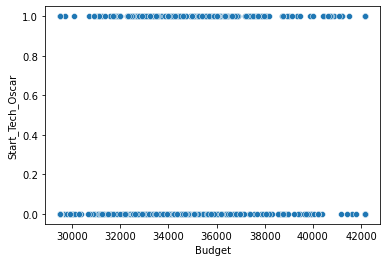

In [227]:
sb.scatterplot(x=movies.Budget,y=movies.Start_Tech_Oscar)

In [228]:
dummy_Set=movies.drop(['Production expense','Multiplex coverage','Movie_length','Lead_ Actor_Rating','Lead_Actress_rating','Producer_rating','Avg_age_actors'],axis=1)

In [229]:
dummy_Set.groupby(['Start_Tech_Oscar']).mean()

,Collection,Marketing expense,Budget,Director_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Num_multiplex,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
Start_Tech_Oscar,,,,,,,,,,,,,,
0,44740.724638,65.830833,34849.73529,7.999828,7.810217,447916.211957,156.045942,257.247559,542.48279,0.583333,0.141304,0.315217,0.213768,0.32971
1,41750.347826,62.816843,34999.61563,8.061152,7.811652,455858.095652,160.081130,251.964591,543.83587,0.513043,0.139130,0.295652,0.165217,0.40000


# Classification Model

In [230]:
X=movies[['Budget']]
y=movies['Start_Tech_Oscar']

In [231]:
from sklearn.linear_model import LogisticRegression

classifier_model=LogisticRegression()
classifier_model.fit(X,y)

LogisticRegression()

In [232]:
classifier_model.coef_

array([[-5.05578871e-06]])

In [233]:
classifier_model.intercept_

array([-1.57690073e-10])

In [234]:
import statsmodels.api as sn

In [235]:
X_const=sn.add_constant(X)

In [236]:
X_const.head()

,const,Budget
0,1.0,36524.125
1,1.0,35668.655
2,1.0,39912.675
3,1.0,38873.890
4,1.0,39701.585


In [237]:
import statsmodels.discrete.discrete_model as sm

In [238]:
logit=sm.Logit(y,X_const).fit()

Optimization terminated successfully.
         Current function value: 0.688741
         Iterations 4


In [239]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Start_Tech_Oscar   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:               0.0003886
Time:                        15:57:05   Log-Likelihood:                -348.50
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                    0.6027
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6856      0.971     -0.706      0.480      -2.589       1.218
Budget      1.441e-05   2.77e-05      0.521      0.603   -3.98e-05    6.87e-05
==============================================================================
"""

# Multiple

In [240]:
X=movies.loc[:,movies.columns!='Start_Tech_Oscar']

In [241]:
X

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,527367.0,109.60,223.8400,23,494.0,1,0,0,0,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,494055.0,146.64,243.4560,42,462.0,0,0,0,1,0
2,69300,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,547051.0,147.88,307.9904,38,458.0,0,0,1,0,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,516279.0,185.36,225.3440,45,472.0,1,0,0,1,0
4,69300,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,531448.0,176.48,225.7920,55,395.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,...,492480.0,186.96,243.5840,27,561.0,0,1,0,0,0
502,41200,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,...,482875.0,132.24,263.2960,20,600.0,1,1,0,0,0
503,47800,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,...,532239.0,109.56,243.8240,31,576.0,0,0,1,0,0
504,44000,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,...,496077.0,158.80,303.5200,47,607.0,1,0,1,0,0


In [242]:
y=movies['Start_Tech_Oscar']

In [243]:
y

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    1
504    1
505    1
Name: Start_Tech_Oscar, Length: 506, dtype: int64

In [244]:
multiple_regressior=LogisticRegression()

In [245]:
multiple_regressior.fit(X,y)

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
multiple_regressior.coef_

array([[-6.74686570e-05, -2.23726628e-03, -1.33735408e-03,
        -3.17974130e-05,  5.33068628e-05, -3.66992841e-03,
         1.07553552e-04,  1.25018449e-04,  1.16871186e-04,
         1.38165819e-04, -1.61253543e-04,  7.76563242e-06,
         3.19334960e-03, -8.16329050e-03, -3.22578804e-03,
        -2.90687657e-04, -1.18724825e-04, -1.35313539e-05,
        -6.31556267e-05, -9.54241353e-05,  1.33101648e-04]])

In [247]:
multiple_regressior.intercept_

array([-3.9009675e-05])

In [248]:
X_const=sn.add_constant(X)
logit=sm.Logit(y,X_const).fit()

Optimization terminated successfully.
         Current function value: 0.614285
         Iterations 6


In [249]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Start_Tech_Oscar   No. Observations:                  506
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                           20
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:                  0.1085
Time:                        15:57:05   Log-Likelihood:                -310.83
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 2.146e-08
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.2972   4.82e+06  -2.55e-06      1.000   -9.45e+06    9.45e+06
Collection             -0.0001   1.66e-05     -6.454      0.000      -0.000   -7.48e-05
Marketing expense      -0.0051      0.002     -2.082      0.037      -0.010      -0.000
Production expense     -0.0006      0.013     -0.048      0.961      -0.025       0.024
Multiplex coverage      3.2077      2.393      1.341      0.180      -1.482       7.897
Budget                  0.0002   5.08e-05      3.152      0.002    6.06e-05       0.000
Movie_length           -0.0072      0.006     -1.162      0.245      -0.019       0.005
Lead_ Actor_Rating     -2.1221      1.637     -1.296      0.195      -5.331       1.086
Lead_Actress_rating     2.4511      1.750      1.400      0.161      -0.979       5.881
Director_rating        -1.4867      1.708     -0.870      0.384      -4.834       1.861
Producer_rating         1.7355      0.921      1.885      0.059      -0.069       3.540
Critic_rating           0.2278      0.161      1.411      0.158      -0.089       0.544
Trailer_views        1.334e-05   3.13e-06      4.263      0.000    7.21e-06    1.95e-05
Time_taken              0.0066      0.003      1.971      0.049    3.82e-05       0.013
Twitter_hastags        -0.0032      0.003     -1.119      0.263      -0.009       0.002
Avg_age_actors         -0.0038      0.008     -0.475      0.634      -0.019       0.012
Num_multiplex           0.0020      0.002      0.850      0.395      -0.003       0.007
3D_available_YES       -0.2810      0.201     -1.396      0.163      -0.675       0.113
Genre_Action           -3.1368   4.82e+06  -6.51e-07      1.000   -9.45e+06    9.45e+06
Genre_Comedy           -3.1277   4.82e+06  -6.49e-07      1.000   -9.45e+06    9.45e+06
Genre_Drama            -3.2180   4.82e+06  -6.67e-07      1.000   -9.45e+06    9.45e+06
Genre_Thriller         -2.8147   4.82e+06  -5.84e-07      1.000   -9.45e+06    9.45e+06
=======================================================================================
"""

In [250]:
multiple_regressior.predict_proba(X)

array([[0.38283333, 0.61716667],
       [0.41603719, 0.58396281],
       [0.77338343, 0.22661657],
       ...,
       [0.42256096, 0.57743904],
       [0.53810666, 0.46189334],
       [0.22961779, 0.77038221]])

In [251]:
y_predict=multiple_regressior.predict(X)

In [252]:
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [253]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [254]:
confusion_matrix(y,y_predict)

array([[190,  86],
       [110, 120]], dtype=int64)

# LDA 

In [255]:
X.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,527367.0,109.60,223.8400,23,494.0,1,0,0,0,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,494055.0,146.64,243.4560,42,462.0,0,0,0,1,0
2,69300,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,547051.0,147.88,307.9904,38,458.0,0,0,1,0,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,516279.0,185.36,225.3440,45,472.0,1,0,0,1,0
4,69300,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,531448.0,176.48,225.7920,55,395.0,0,0,0,1,0


In [256]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Start_Tech_Oscar, dtype: int64

In [257]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [258]:
LDA=LinearDiscriminantAnalysis()

In [259]:
LDA.fit(X,y)

LinearDiscriminantAnalysis()

In [260]:
predicted=LDA.predict(X)

In [261]:
predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [262]:
confusion_matrix(y,predicted)

array([[193,  83],
       [ 97, 133]], dtype=int64)

# Train Split DataSet

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [265]:
Logistic_rgx=LogisticRegression()

In [266]:
Logistic_rgx.fit(X_train,y_train)

LogisticRegression()

In [267]:
y_test_result=Logistic_rgx.predict(X_test)

In [268]:
confusion_matrix(y_test,y_test_result)

array([[36, 24],
       [18, 24]], dtype=int64)

In [269]:
Logistic_rgx.score(X_test,y_test)

0.5882352941176471

# KNN Algorithm

In [270]:
from sklearn import preprocessing

In [271]:
scaled=preprocessing.StandardScaler().fit(X_train)

In [272]:
X_train_knn=scaled.transform(X_train)

In [273]:
X_train_knn

array([[-1.36213663,  2.08575877,  1.03323679, ..., -0.66547513,
         1.98162289, -0.74420841],
       [-0.27747882, -0.47718231, -0.41315956, ..., -0.66547513,
        -0.50463688,  1.34370962],
       [-0.34612805, -0.65745212, -0.71521823, ...,  1.50268577,
        -0.50463688, -0.74420841],
       ...,
       [ 0.35409408, -0.66342837, -1.30336132, ...,  1.50268577,
        -0.50463688, -0.74420841],
       [-1.16991879,  2.08575877,  1.03323679, ..., -0.66547513,
        -0.50463688, -0.74420841],
       [-0.45596682, -0.59841956, -0.35216694, ..., -0.66547513,
        -0.50463688, -0.74420841]])

In [274]:
scaled=preprocessing.StandardScaler().fit(X_test)

In [275]:
X_test_knn=scaled.transform(X_test)

In [276]:
X_test_knn

array([[ 0.42106523, -0.66297032, -1.14921855, ...,  1.51338117,
        -0.4152274 , -0.78679579],
       [ 1.73443409, -0.6734444 , -0.79642905, ..., -0.66077206,
        -0.4152274 ,  1.27097782],
       [-1.07139937, -0.65883286,  2.39213032, ...,  1.51338117,
        -0.4152274 , -0.78679579],
       ...,
       [-0.53411211,  1.99336716,  0.95107489, ...,  1.51338117,
        -0.4152274 , -0.78679579],
       [ 0.25689413, -0.67479589, -1.08344424, ..., -0.66077206,
        -0.4152274 ,  1.27097782],
       [ 0.09272302, -0.66198042,  0.16327799, ...,  1.51338117,
        -0.4152274 , -0.78679579]])

# KNN with n=1

In [277]:
from sklearn.neighbors import KNeighborsClassifier

In [278]:
KNN_OBJ_1=KNeighborsClassifier(n_neighbors=1)

In [279]:
KNN_OBJ_1.fit(X_train_knn,y_train)

KNeighborsClassifier(n_neighbors=1)

In [280]:
confusion_matrix(y_test,KNN_OBJ_1.predict(X_test_knn))

array([[37, 23],
       [16, 26]], dtype=int64)

In [286]:
accuracy_score(y_test,KNN_OBJ_1.predict(X_test_knn))*100

61.76470588235294

Find the best n value for KNN

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
n={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
GridCV=GridSearchCV(KNeighborsClassifier(),n)

In [284]:
GridCV.fit(X_train_knn,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [285]:
GridCV.best_params_

{'n_neighbors': 1}

Conclusion
KNN Classifier classify efficiently when n=1